In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [0]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data[:,[9,12]]
y = wine.target

# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [3]:
# covariance_typeに'diag'を指定しGMMのモデルを作成
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=1)

#モデルの訓練
model.fit(X_std)

# covariance_typeに'full'を指定し GMMのモデルを作成
model2 = GaussianMixture(n_components=3, covariance_type='full', random_state=1)

#モデルの訓練
model2.fit(X_std)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<function matplotlib.pyplot.show>

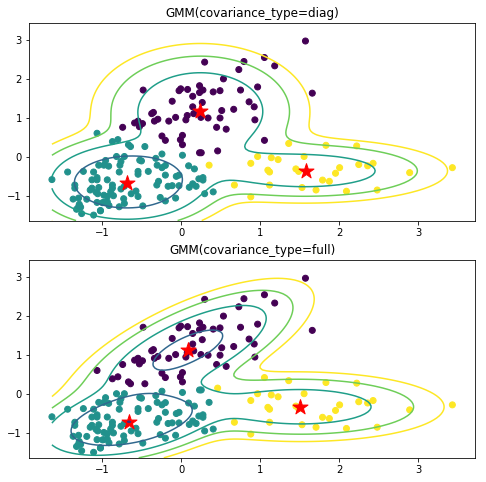

In [81]:
plt.figure(figsize=(8,8)) #プロットのサイズ指定
# 色とプロリンの散布図のGMM(diag)によるクラスタリング
plt.subplot(2, 1, 1)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model.predict(X_std))
plt.scatter(model.means_[:,0], model.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=diag)')

# 色とプロリンの散布図のGMM(full)によるクラスタリング
plt.subplot(2, 1, 2)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model2.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model2.predict(X_std))
plt.scatter(model2.means_[:,0], model2.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=full)')

plt.show

In [83]:
model.predict(X_std) #予測

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
model.weights_ #混合係数

array([0.33382347, 0.50039829, 0.16577824])

In [21]:
model.means_ #平均ベクトル

array([[ 0.24529784,  1.16494852],
       [-0.68692906, -0.65838607],
       [ 1.5795315 , -0.35850242]])

In [23]:
model.covariances_ # covariance_type='diag'の共分散行列

array([[0.3247152 , 0.51324971],
       [0.24025176, 0.23149423],
       [0.61267547, 0.13016258]])

In [24]:
model2.covariances_ # covariance_type='full'の共分散行列

array([[[ 0.3930839 ,  0.3184785 ],
        [ 0.3184785 ,  0.51537395]],

       [[ 0.2722111 ,  0.0899247 ],
        [ 0.0899247 ,  0.1860756 ]],

       [[ 0.62958843, -0.00149391],
        [-0.00149391,  0.15105973]]])

In [73]:
# VBGMMのモデルを作成
model3 = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=18)

#モデルの訓練
model3.fit(X_std)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=18, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

<function matplotlib.pyplot.show>

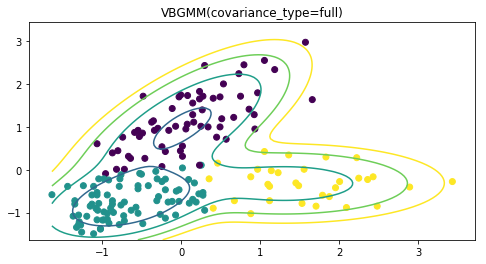

In [82]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 色とプロリンの散布図のVBGMMによるクラスタリング
x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model3.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model3.predict(X_std))
plt.title('VBGMM(covariance_type=full)')

plt.show

In [75]:
model3.means_ #平均ベクトル

array([[ 2.60190018e-02,  9.97648066e-01],
       [-6.76427146e-01, -7.50901816e-01],
       [ 1.32006315e+00, -3.23292868e-01],
       [ 5.23449858e-08,  2.80681840e-08],
       [ 2.37646177e-12,  1.27412242e-12],
       [ 1.32838897e-16, -1.01820207e-16],
       [ 2.49537302e-17, -1.59669898e-16],
       [ 2.49488322e-17, -1.59672525e-16],
       [ 2.49488320e-17, -1.59672525e-16],
       [ 2.49488320e-17, -1.59672525e-16]])

In [76]:
model3.weights_ #混合係数

array([3.83238590e-01, 4.16040082e-01, 2.00182821e-01, 4.89551515e-04,
       4.45045720e-05, 4.04587018e-06, 3.67806380e-07, 3.34369437e-08,
       3.03972215e-09, 2.76338377e-10])

<function matplotlib.pyplot.show>

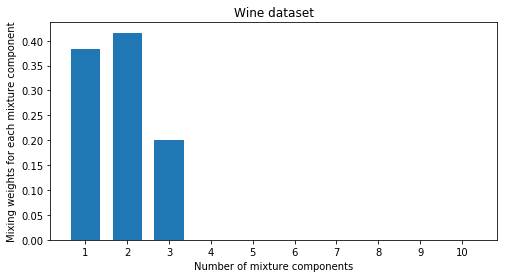

In [72]:
# 混合係数の可視化
x =np.arange(1, model3.n_components+1)

plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.bar(x, model3.weights_, width=0.7, tick_label=x)

plt.ylabel('Mixing weights for each mixture component')
plt.xlabel('Number of mixture components')
plt.title('Wine dataset')
plt.show